2024.09.27
1. calculate the transfer kernel of RS and ASM

In [13]:
import numpy as np
import matplotlib.pyplot as plt


RS kernel

In [109]:
def TF_RS(X,Y,z,lam):
    
    dx = X[0, 1] - X[0, 0]  # Corrected: Use the correct indexing for dx
    dy = Y[1, 0] - Y[0, 0]  # Added: Calculate dy separately
    r = np.sqrt(z**2 + X**2 + Y**2 + 1e-15)  # distance between points, avoid division by zero
    k = 2 * np.pi / lam                      # wave vector
    h = 1 / (2 * np.pi) * ((1 / r) - 1j * k) * np.exp(1j * k * r) * z / r**2  # impulse response

    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(h))) * dx * dy


def TF_ASM(X, Y, z, lambda_):
    Nx, Ny = np.shape(X)
    dx = X[0, 1] - X[0, 0]  # Corrected: Use the correct indexing for dx
    dy = Y[1, 0] - Y[0, 0]  # Added: Calculate dy separately
    
    fx = np.fft.fftshift(np.fft.fftfreq(Nx, dx))
    fy = np.fft.fftshift(np.fft.fftfreq(Ny, dy))  # Corrected: Use dy instead of dx
    fX, fY = np.meshgrid(fx, fy, indexing='ij')  # Added: Use 'ij' indexing to match X and Y
    
    k = 2 * np.pi / lambda_
    
    # Compute transfer function
    inside_sqrt = 1 - (lambda_ * fX)**2 - (lambda_ * fY)**2
    inside_sqrt = np.where(inside_sqrt > 0, np.sqrt(inside_sqrt), 0)  # Set invalid sqrt values to 0
    
    # Compute transfer function H
    H = np.exp(1j * k * z * inside_sqrt)  # Corrected: Moved inside_sqrt into the exponent
    
    return H

C:\Users\liwenyi\AppData\Local\Temp\ipykernel_32684\3012249060.py:25: RuntimeWarning: invalid value encountered in sqrt
  inside_sqrt = np.where(inside_sqrt > 0, np.sqrt(inside_sqrt), 0)  # Set invalid sqrt values to 0


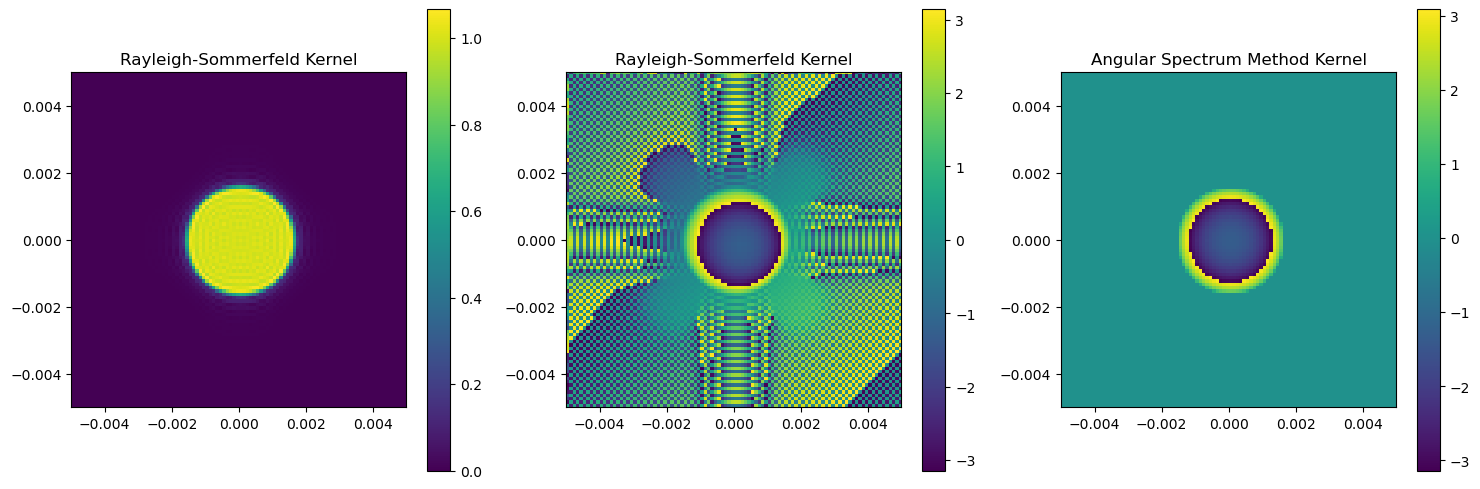

In [110]:
# Define parameters
z = 0.0005  # Propagation distance
lam = 0.000632  # Wavelength in mm
Nx, Ny = 100, 100  # Grid size
x = np.linspace(-0.005, 0.005, Nx)
y = np.linspace(-0.005, 0.005, Ny)
X, Y = np.meshgrid(x, y)

# Compute kernels
H_RS = TF_RS(X, Y, z, lam)
H_ASM = TF_ASM(X, Y, z, lam)

# Plot comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Rayleigh-Sommerfeld Kernel")
plt.imshow(np.abs(H_RS), extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Rayleigh-Sommerfeld Kernel")
plt.imshow(np.angle(H_RS), extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Angular Spectrum Method Kernel")
plt.imshow(np.angle(H_ASM), extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()

plt.tight_layout()
plt.show()

Maximum absolute difference: 3.141592653589793
Mean absolute difference: -0.08047874608037155


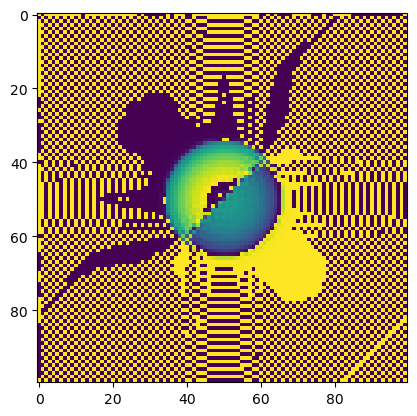

In [111]:
# Compare the results
difference = np.angle(H_RS - H_ASM)
plt.imshow(difference)
print(f"Maximum absolute difference: {np.max(difference)}")
print(f"Mean absolute difference: {np.mean(difference)}")